<a href="https://colab.research.google.com/github/iashyam/Machine-Learning-Projects/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [2]:
data = pd.read_csv('train.csv', index_col='ID')

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


# Data

The data is created by:

Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

The columsn mean the following:

* `crim`: Per capita crime rate in area.
* `zn`: proportion of residential land zoned for lots over $25,000$ sq.ft.
* `indus`: proportion of non-retail business acres per town.
* `chas`: Charles River dummy variable ($1$ if tract bounds river; $0$ otherwise).
* `nox`: nitrogen oxides concentration (parts per $10$ million).
* `rm`: average number of rooms per dwelling.
* `age`: proportion of owner-occupied units built prior to 1940.
* `dis`: weighted mean of distances to five Boston employment centres.
* `rad`: index of accessibility to radial highways.
* `tax`: ull-value property-tax rate per $\$10,000$.
* `ptratio`: pupil-teacher ratio by town.
* `black`: $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town.
* `lstat`: lower status of the population (percent).
* `medv`: median value of owner-occupied homes in $\$1000s$.



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  black    333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [5]:
data.shape

(333, 14)

In [6]:
data.isna().sum().sum()

0

In [7]:
#COMPUTE THE CORRELATION OF ALL THE VARIABLES WITH THE MEDV COLUM
data.corr()['medv'].sort_values(ascending=False)

,medv
medv,1.000000
rm,0.689598
zn,0.344842
black,0.336660
dis,0.249422
chas,0.204390
rad,-0.352251
age,-0.358888
crim,-0.407454
nox,-0.413054


In [8]:
#data preparation

y = data['medv']
x = data.drop('medv', axis=1)

scaler = StandardScaler()
x = scaler.fit_transform(x)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
#we start making neural network

class Net(Sequential):

    def __init__(self, n_input: int, hidden_layers:list, n_output: int):
        super().__init__()
        self.add(Input(shape=(n_input,)))
        for layer in hidden_layers:
            self.add(Dense(layer, activation='relu'))
        self.add(Dense(n_output, activation='linear'))

    def compile_model(self):
        self.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mae'])

    def train_model(self, x, y, x_val, y_val, epochs, batch_size):
        return self.fit(x, y, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

In [10]:
n_input = train_x.shape[1]
hidde_layers = [32, 32]
n_output = 1

model = Net(n_input, hidde_layers, n_output)
model.compile_model()

In [11]:
history = model.train_model(train_x, train_y, test_x ,test_y, epochs=200, batch_size=32)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.0000e+00 - loss: 623.7012 - mae: 23.3085 - val_accuracy: 0.0000e+00 - val_loss: 596.5487 - val_mae: 22.6061
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 578.4241 - mae: 22.4681 - val_accuracy: 0.0000e+00 - val_loss: 574.7385 - val_mae: 22.1240
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 572.5905 - mae: 22.3460 - val_accuracy: 0.0000e+00 - val_loss: 553.2390 - val_mae: 21.6475
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 559.6775 - mae: 21.9569 - val_accuracy: 0.0000e+00 - val_loss: 530.6014 - val_mae: 21.1432
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 532.9073 - mae: 21.4422 - val_accuracy: 0.0000e+00 - val_loss: 505.5225 - val_mae: 20.5689
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 495.0318 - mae: 20.5344 - val_accuracy: 0.0000e+00 - val_lo

In [12]:
def plot_history(history):
    plt.style.use('ggplot')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

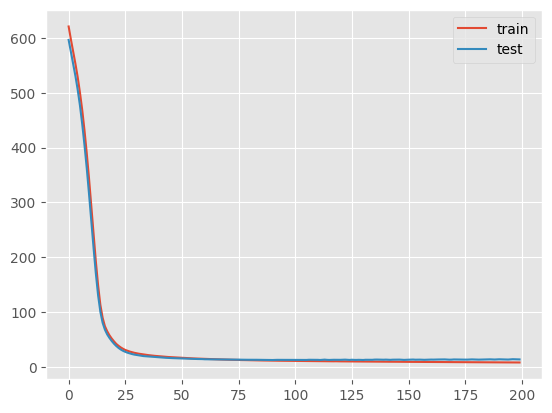

In [13]:
plot_history(history)

In [14]:
model_eval = model.evaluate(test_x, test_y)
print(model_eval)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 13.7791 - mae: 2.6201 
[13.548584938049316, 0.0, 2.5992250442504883]
